## FDL- DSBA Assignment 2021-2022

### Please fill the blanks in the code and answer to the questions that are asked in the Jupyter Notebook ("Markdown" cell). 

### Instructions: Rename the jupyter adding your name at the end of the title FDL_Assignment-<YOUR NAME\>.ipynb

### Send your solution to fdl.dsba@gmail.com by 20 / 12 / 2021, as subject for the mail please put FDL_Assignment-<YOUR NAME\>

In [1]:
!pip install ssl

ERROR: Could not find a version that satisfies the requirement ssl (from versions: 1.15, 1.16)
ERROR: No matching distribution found for ssl


In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

### Question 1 -  TRAIN ON CIFAR DATASET
In this exercise you are asked to train a Convolutional Neural Network (CNN) on the CIFAR10 dataset and visualize its feature maps.

1a) Download the CIFAR10 dataset using the already provided PyTorch dataloaders. 
*   Read and understand the following code
*   Feel free to add additional transformations for data augmentation. Explain if so. 

In [ ]:
## Download the CIFAR10 dataset using the PyTorch dataloaders
import json 
from pprint import pprint
import torch
import torchvision
import torchvision.transforms as transforms

# *****START CODE 
## Data
##Here you are free to add further transform functions if you wish
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.ToTensor(),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_dataloader = torch.utils.data.DataLoader(trainset, batch_size= 32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
val_dataloader = torch.utils.data.DataLoader(testset, batch_size= 32, shuffle=False)
# *****END CODE

==> Preparing data..


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
# to get the length of the taindata
print(len(trainset))
# get sample of train data and see length
sample = next(iter(trainset))
print(len(sample))
# get the image and it's label
image, label = sample
print(type(image))
print(type(label))
# view image shape
image.shape
# length of test data
print(len(testset))

50000
2
<class 'torch.Tensor'>
<class 'int'>
10000


1b) Create your convolutional neural network.
*   Go to https://dljudge.io/generate + /<YOUR NAME\> or use curl below
*   Save the page as json 
*   Build your CNN architecture based on those modules and hyperparameters
*   Use the right value for 'COMPUTE' 
*   See the example below

In [ ]:
!curl https://dljudge.io/generate/vidhijain -o network1.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2768  100  2768    0     0   2768      0  0:00:01 --:--:--  0:00:01  4659


In [ ]:
def validate_network(model, input_dict):
    """
    Validate if your network definition is same as provided archtiecture
    """
    output = {}
    i = 1
    for layer in model.children():
        if isinstance(layer, nn.Conv2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Conv2d',
                                                  'kernel_size': layer.kernel_size[0],
                                                   'input': layer.in_channels,
                                                   'output': layer.out_channels,
                                                   'padding': layer.padding[0]}

        if isinstance(layer, nn.ReLU):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'ReLU'}

        if isinstance(layer, nn.MaxPool2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'MaxPool2d',
                                                  'kernel_size': layer.kernel_size,
                                                  'stride': layer.stride}

        if isinstance(layer, nn.AdaptiveAvgPool2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'AdaptiveAvgPool2d',
                                                  'output': layer.output_size}

        if isinstance(layer, nn.BatchNorm2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'BatchNorm2d',
                                                  'input': layer.num_features}

        if isinstance(layer, nn.Dropout):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Dropout',
                                                  'p': layer.p}

        if isinstance(layer, nn.Linear):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Linear',
                                                  'input': layer.in_features,
                                                  'output': layer.out_features}

        i += 1

    
    correct = True
    for l in output.keys():
        if l in input_dict:
            inp_kvs = input_dict[l]
            out_kvs = output[l]
            for k in out_kvs:
                if inp_kvs[k] != 'COMPUTE':
                    if out_kvs[k] != inp_kvs[k]:
                        print (f'Error in {l}, {k}!')
                        correct = False

    if correct:
        print ('OK!')

In [ ]:
# *****START CODE 
# Import your individual architecture dictionnary here
fin = open('/content/drive/My Drive/essec assignment/Deep Learning/network1.json', 'r')
my_architecture_dict = json.load(fin)
fin.close()

pprint(my_architecture_dict)
# *****END CODE

{'Layer_001': {'input': 3,
               'kernel_size': 3,
               'output': 50,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_002': {'input': 50, 'type': 'BatchNorm2d'},
 'Layer_003': {'type': 'ReLU'},
 'Layer_004': {'input': 50,
               'kernel_size': 3,
               'output': 50,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_005': {'input': 50, 'type': 'BatchNorm2d'},
 'Layer_006': {'type': 'ReLU'},
 'Layer_007': {'kernel_size': 2, 'stride': 2, 'type': 'MaxPool2d'},
 'Layer_008': {'input': 50,
               'kernel_size': 3,
               'output': 116,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_009': {'input': 116, 'type': 'BatchNorm2d'},
 'Layer_010': {'type': 'ReLU'},
 'Layer_011': {'input': 116,
               'kernel_size': 3,
               'output': 116,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_012': {'input': 116, 'type': 'BatchNorm2d'},
 'Layer_013'

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# *****START CODE
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        """
        Number of layers should be exactly same as in the provided JSON. 
        Do not use any grouping function like Sequential 
        """
        
        #final network:
        self.conv1 = nn.Conv2d(3,50, kernel_size=3, padding=1) #3, 50
        self.batchnorm2 = nn.BatchNorm2d(50) #3, 50
        self.relu3 = nn.ReLU(inplace=True)
        
        self.conv4 = nn.Conv2d(50,50, kernel_size=3, padding=1) #50, 50
        self.batchnorm5 = nn.BatchNorm2d(50)
        self.relu6 = nn.ReLU(inplace=True)
        self.maxpool7 = nn.MaxPool2d(kernel_size=2, stride=2) #25, 25
        
        self.conv8 = nn.Conv2d(50,116, kernel_size=3, padding=1)
        self.batchnorm9 = nn.BatchNorm2d(116)
        self.relu10 = nn.ReLU(inplace=True)
        self.conv11 = nn.Conv2d(116,116, kernel_size=3, padding=1)
        self.batchnorm12 = nn.BatchNorm2d(116)
        self.relu13 = nn.ReLU(inplace=True)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv15 = nn.Conv2d(116,258, kernel_size=3, padding=1)
        self.batchnorm16 = nn.BatchNorm2d(258)
        self.relu17 = nn.ReLU(inplace=True)
        self.conv18 = nn.Conv2d(258,258, kernel_size=3, padding=1)
        self.batchnorm19 = nn.BatchNorm2d(258)
        self.relu20 = nn.ReLU(inplace=True)
        self.conv21 = nn.Conv2d(258,258, kernel_size=3, padding=1)
        self.batchnorm22 = nn.BatchNorm2d(258)
        self.relu23 = nn.ReLU(inplace=True)
        self.maxpoo24 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv25 = nn.Conv2d(258,513, kernel_size=3, padding=1)
        self.batchnorm26 = nn.BatchNorm2d(513)
        self.relu27 = nn.ReLU(inplace=True)
        self.conv28 = nn.Conv2d(513,513, kernel_size=3, padding=1)
        self.batchnorm29 = nn.BatchNorm2d(513)
        self.relu30 = nn.ReLU(inplace=True)
        self.conv31 = nn.Conv2d(513,513, kernel_size=3, padding=1)
        self.batchnorm32 = nn.BatchNorm2d(513)
        self.relu33 = nn.ReLU(inplace=True)
        self.maxpool34 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv35 = nn.Conv2d(513,513, kernel_size=3, padding=1)
        self.batchnorm36 = nn.BatchNorm2d(513)
        self.relu37 = nn.ReLU(inplace=True)
        self.conv38 = nn.Conv2d(513,513, kernel_size=3, padding=1)
        self.batchnorm39 = nn.BatchNorm2d(513)
        self.relu40 = nn.ReLU(inplace=True)
        self.conv41 = nn.Conv2d(513,513, kernel_size=3, padding=1)
        self.batchnorm42 = nn.BatchNorm2d(513)
        self.relu43 = nn.ReLU(inplace=True)
        self.maxpool44 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.avgpool45 = nn.AdaptiveAvgPool2d(4)
        self.dropout46 = nn.Dropout(p=0.41235089497286226)
        self.fc147 = nn.Linear(513*4*4, 2109)
        self.relu48 = nn.ReLU(inplace=True)
        self.fc149 = nn.Linear(2109, 2657)
        self.relu50 = nn.ReLU(inplace=True)
        self.fc151 = nn.Linear(2657, 10)
            
    def forward(self, x):
        x = self.batchnorm2(self.conv1(x))
        x = self.batchnorm5(self.conv4(self.relu3(x)))
        x = self.conv8(self.maxpool7(self.relu6(x)))
        x = self.conv11(self.relu10(self.batchnorm9(x)))
        x = self.maxpool4(self.relu13(self.batchnorm12(x)))
        x = self.relu17(self.batchnorm16(self.conv15(x)))
        x = self.relu20(self.batchnorm19(self.conv18(x)))
        x = self.relu23(self.batchnorm22(self.conv21(x)))
        x = self.batchnorm26(self.conv25(self.maxpoo24(x)))
        x = self.batchnorm29(self.conv28(self.relu27(x)))
        x = self.batchnorm32(self.conv31(self.relu30(x)))
        x = self.conv35(self.maxpool34(self.relu33(x)))
        x = self.conv38(self.relu37(self.batchnorm36(x)))
        x = self.conv41(self.relu40(self.batchnorm39(x)))
        x = self.maxpool44(self.relu43(self.batchnorm42(x)))
        x = self.avgpool45(x)
        x = self.dropout46(x)
        # print(x.shape)
        x = x.view(-1, 513*4*4)
        # print(x.shape)
        x = self.fc147(x)
        x = self.relu48(x)
        x = self.fc149(x)
        x = self.relu50(x)
        x = self.fc151(x)

        return x
# *****END CODE

1c) Create the training scheme
*    Initialize the model
*    Validate the model
*    Specify the training hyperparameters like type of optimizer, criterion and learning rate
*    Specify number of epochs

In [ ]:
# *****START CODE
import torch.optim as optim
#learning rate during each epoch, keep lower values
lr =  3e-4
# model = Net()
model = ConvNet()
validate_network(model, my_architecture_dict)
# choosing Adam as it is known to reach a local minima soon
optimizer = optim.Adam(model.parameters(), lr, weight_decay =0.0001)
criterion = nn.CrossEntropyLoss()
epochs = 10
# *****END CODE

OK!


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
model.to(device)

cuda


ConvNet(
  (conv1): Conv2d(3, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm2): BatchNorm2d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU(inplace=True)
  (conv4): Conv2d(50, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm5): BatchNorm2d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu6): ReLU(inplace=True)
  (maxpool7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv8): Conv2d(50, 116, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm9): BatchNorm2d(116, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu10): ReLU(inplace=True)
  (conv11): Conv2d(116, 116, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm12): BatchNorm2d(116, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu13): ReLU(inplace=True)
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=

1d) Plot the train and validation loss curves for the entire training process
*   Validate the model after each epoch
*   Plot both training and validation loss curves
*   Write a small description discussing about the curves. What is the behaviour of the model?

In [ ]:
# You can think of a for-loop over the number of epochs where each loop proceeds over the training dataset. 
# Within this for-loop is another nested for-loop that iterates over each batch of samples, 
# where one batch has the specified “batch size” number of samples


epoch_losses = [] # using this to record the training loss so that we can plot it against the epoch
test_epoch_losses = []
model.train()
for epoch in range(epochs):
    running_loss = 0.0
    saved_loss = 0.0
    test_running_loss = 0.0
    test_saved_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get inputs and labels and convert to appropriate device
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print stats
        running_loss += loss.item()
        if i % 2000 == 240:  # print every 2000 mini-batches
            print('%d, %5d| loss: %.3f' %(epoch+1, i+1, running_loss/2000))
            saved_loss += running_loss
            running_loss = 0.0


    for i, data in enumerate(val_dataloader, 0):
        # get inputs and labels and convert to appropriate device
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print stats
        test_running_loss += loss.item()
        if i % 2000 == 240:  # print every 2000 mini-batches
            print('%d, %5d| Validation loss: %.3f' %(epoch+1, i+1, test_running_loss/2000))
            test_saved_loss += test_running_loss
            test_running_loss = 0.0
    epoch_losses.append(saved_loss/50000)
    test_epoch_losses.append(test_saved_loss/10000)
print('Training done!')  # print when finished training

1,   241| loss: 0.255
1,   241| Validation loss: 0.167
2,   241| loss: 0.152
2,   241| Validation loss: 0.121
3,   241| loss: 0.112
3,   241| Validation loss: 0.097
4,   241| loss: 0.091
4,   241| Validation loss: 0.080
5,   241| loss: 0.075
5,   241| Validation loss: 0.068
6,   241| loss: 0.067
6,   241| Validation loss: 0.060
7,   241| loss: 0.057
7,   241| Validation loss: 0.050
8,   241| loss: 0.050
8,   241| Validation loss: 0.045
9,   241| loss: 0.045
9,   241| Validation loss: 0.038
10,   241| loss: 0.039
10,   241| Validation loss: 0.033
Training done!


In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

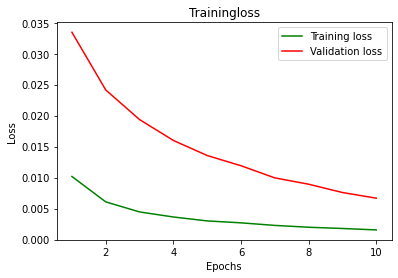

In [ ]:
## Provide the train loss graph.
epochs_list = range(1,epochs+1)
plt.plot(epochs_list, saved_loss, 'g', label='Training loss')
plt.plot(epochs_list, test_saved_loss, 'r', label='Validation loss')
plt.title('Trainingloss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#the Training and Validation loss both reduce after a given point of epoch. Although Validation loss seems to have a scope of reducing even more
#I believe if we run for higher epochs

In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/essec assignment/Deep Learning/assignment_optimal_model1.pt')

#a small description discussing about the curves. What is the behaviour of the model?

the curve approaches zero. The lower the loss, the better the model can predict. Normally, the lowest point on the curve is where the model can predict well. If the curve starts increasing back, it means that our model is overfitting. Usually, in those cases where the curve starts increasing back, we adjust the number of epochs so that our model trains just for the number of epochs where the curse is lowest. That way, we can get some good performance(accuracy) for our model.
For my case, I trained just for 10 epochs. 

1e) Get an intermediate layer from your convolutional neural network and visualize what patterns the network has learned
*   Complete the following code that visualizes the patterns of the network
*   Write a small description commenting on the visualized maps. What do you observe in the different visualizations of the feature maps?

In [ ]:
# The intermediate layer you should visualize:
print('My intermediate layer to visualize is: %s'%(my_architecture_dict['Layer_004']))

My intermediate layer to visualize is: {'input': 50, 'kernel_size': 3, 'output': 50, 'padding': 1, 'type': 'Conv2d'}


Model 1 Parameters :  torch.Size([50, 3, 3, 3])
Model 2 Parameters :  torch.Size([50])
Model 3 Parameters :  torch.Size([50])
Model 4 Parameters :  torch.Size([50])
Model 5 Parameters :  torch.Size([50, 50, 3, 3])
Model 6 Parameters :  torch.Size([50])
Model Parameters Length:  6
Filter 0. Epoch 5. Loss = -3560.2131
Filter 1. Epoch 5. Loss = -3532.3298
Filter 2. Epoch 5. Loss = -3631.0354
Filter 3. Epoch 5. Loss = -3574.7048
Filter 4. Epoch 5. Loss = -3550.4170
Filter 5. Epoch 5. Loss = -3560.8206
Filter 6. Epoch 5. Loss = -3561.4658
Filter 7. Epoch 5. Loss = -3570.1709
Filter 8. Epoch 5. Loss = -3592.6782
Filter 9. Epoch 5. Loss = -3561.2598
Filter 10. Epoch 5. Loss = -3527.3379
Filter 11. Epoch 5. Loss = -3560.2971
Filter 12. Epoch 5. Loss = -3483.5562
Filter 13. Epoch 5. Loss = -3592.8032
Filter 14. Epoch 5. Loss = -3565.3215
Filter 15. Epoch 5. Loss = -3545.4407
Filter 16. Epoch 5. Loss = -3547.8535
Filter 17. Epoch 5. Loss = -3577.6367
Filter 18. Epoch 5. Loss = -3576.2756
Filter 

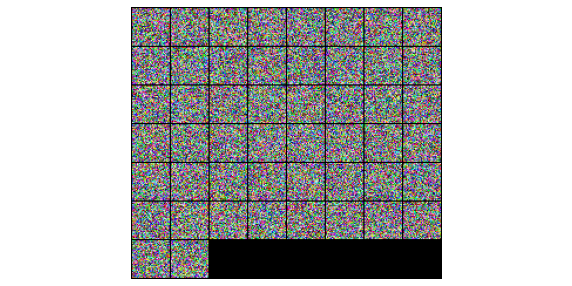

In [ ]:
import sys
from skimage import io
import torchvision.utils as vutils

##function for printing the loss during optimization
def write_flush(text, stream=sys.stdout):
    stream.write(text)
    stream.flush()
    return

## Number of feature maps in the intermediate layer that you have chosen. 
# *****START CODE
n_conv = 50   # e.g 64
# *****END CODE

## Size of visualised filter.
img_size = 32

##load your optimal model
# *****START CODE
model = ConvNet()
if torch.cuda.is_available():
  model.load_state_dict(torch.load('/content/drive/My Drive/essec assignment/Deep Learning/assignment_optimal_model1.pt'))
else:
  model.load_state_dict(torch.load('/content/drive/My Drive/essec assignment/Deep Learning/assignment_optimal_model1.pt', 
                                   map_location=torch.device('cpu')))
# *****END CODE

## Create a submodel, until the intermediate layer of your choice.
## Hint: Use model.#name# to create the succession of layers, where #name#
## stands for the layer names that you defined in the initialization function 
## of your model.
# *****START CODE
submodel = nn.Sequential(
    model.conv1, model.batchnorm2, model.relu3, model.conv4
)
print("Model 1 Parameters : ",list(submodel.parameters())[0].size())
print("Model 2 Parameters : ",list(submodel.parameters())[1].size())
print("Model 3 Parameters : ",list(submodel.parameters())[2].size())
print("Model 4 Parameters : ",list(submodel.parameters())[3].size())
print("Model 5 Parameters : ",list(submodel.parameters())[4].size())
print("Model 6 Parameters : ",list(submodel.parameters())[5].size())
print("Model Parameters Length: ",len(list(submodel.parameters())))
# *****END CODE

## Put submodel in eval mode.
submodel.eval()

## Tensor to visualised filters. 
img_stack = torch.zeros((n_conv, 3, img_size, img_size))

## Number of epochs to run for every filter. 
# *****START CODE
n_epochs_per_filt = 5   #e.g 30
# *****END CODE

## Visualise every convolution. 
for c in range(n_conv):
    ## Initialise with random image. 
    img = torch.rand(1, 3, img_size, img_size).float()

    ## Turn on gradient calculation on the image
    # *****START CODE
    img.requires_grad_(True)
    # *****END CODE

    ## Define optimizer.
    # *****START CODE
    optimizer = optim.Adam(submodel.parameters(), lr, weight_decay =0.0001)
    # *****END CODE
    
    for f in range(n_epochs_per_filt):
        ## Feedforward propagation
        ## Hint: In order to find the loss, compupte the negative of the activation of the hidden layer. 
        ## The objective is to produce an input image which maximizes the activation 
        ## of neurons in a particular hidden layer. 
        # *****START CODE
        optimizer.zero_grad()
        output = submodel(img)
        loss=-F.relu(output).sum()
        optimizer.step()        
        # *****END CODE
        write_flush('\rFilter %d. Epoch %d. Loss = %.4f'%(c, f+1, loss.item()))

    write_flush('\n')
    img_stack[c, :, :, :] = img[0].detach()

## Make grid out of visualized filters. 
##Here you may have to adjust the properties of vutils.make_grid, depending on your needs. 
##For example, you may need to change the number of rows.
G = vutils.make_grid(img_stack, nrow=8, normalize=True, padding=1).permute(1,2,0).numpy()
plt.figure(figsize=(10,5))
plt.imshow(G)
plt.axis('equal')
plt.axis('off')
plt.show()

1f) Use GradCAM algorithm to visualize the saliency maps of your trained model at the same intermediate layer
*   Install pytorch grad cam package if needed (https://github.com/jacobgil/pytorch-grad-cam)
*   Complete the following code that visualizes GradCAM heatmaps on an input image from your model
*   Try on several input images / classes. 
*   Write a small description commenting on the visualized heatmaps. 

In [ ]:
# Install pytorch grad cam package
! pip install grad-cam
torch.cuda.is_available()


     |████████████████████████████████| 4.5 MB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for grad-cam: filename=grad_cam-1.3.7-py3-none-any.whl size=25953 sha256=b54e7b9f3f7e400b9f301a65319e0b6aa1b3bbec77648a5eabe8203c866a48b1
  Stored in directory: /root/.cache/pip/wheels/30/ab/9c/53c523785edffdc6c61755cf82e0dac3342d0d36190c187894
Successfully built grad-cam


True

rbg image: (32, 32, 3)
tensor size: torch.Size([1, 3, 32, 32])


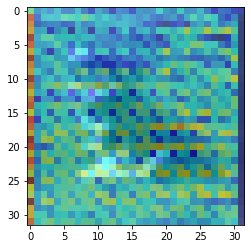

In [ ]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
# use_cuda = True
use_cuda = torch.cuda.is_available()

# ***START CODE
model = ConvNet()
if torch.cuda.is_available():
  model.load_state_dict(torch.load('/content/drive/My Drive/essec assignment/Deep Learning/assignment_optimal_model1.pt'))
else:
  model.load_state_dict(torch.load('/content/drive/My Drive/essec assignment/Deep Learning/assignment_optimal_model1.pt', 
                                   map_location=torch.device('cpu')))

# Get your intermediate layer
target_layers = [model.conv4]


# uncomment and use 
rgb_img = train_dataloader.dataset.data[70]/255#.reshape(1,32,32,3)
print("rbg image:",rgb_img.shape)
# uncomment and use 
# input_tensor = (transforms.ToTensor())(rgb_img)  # Create an input tensor from your image for your model..
input_tensor = torch.from_numpy(rgb_img.reshape(1,3,32,32)).float().to(device)

print("tensor size:",input_tensor.shape)

# Note: input_tensor can be a batch tensor with several images!
target_category = train_dataloader.dataset.targets[0]
# ***END CODE

# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=use_cuda)

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
# grayscale_cam = cam(input_tensor=input_tensor, target_category=target_category)
grayscale_cam = cam(input_tensor=input_tensor, targets=None)
# , aug_smooth=True, eigen_smooth=True
# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

# Plot figure
plt.figure()
plt.imshow(visualization)

Hi,
My model for Question 2 is done in a different sheet as I was using the same model and didnt want the values to get jumbled up, as it threw me error once.

# I have created two Colab files for each question and have descriptively answered each of them in their file.

Thank you!:

### Question 2 - Train on geometrical shapes

Function 'generate_a_triangle' produces images depicting random triangles along with the (x,y) coordinates of the vertices. Create a convolutional neural network that receives as input the triangle image and predicts the corresponding (x,y) coordinates of the triangle's vertices. 
*  Read and understand the following code

2a) Use function 'generate_dataset_regression' to create the dataset. Split the dataset to training and validation parts.

2b) Use function 'generate_test_set' to create the testing dataset.

2c) Create your own convolutional neural network.
* Begin with the previous exercise model architecture
* Optimize the architecture to perform well on predicting the different coordinates

2d) Define learning rate, model, optimizer, criterion and number of epochs.

2e) What criterion did you choose and why?
* Write a small description for the loss function that you want to use for this specific problem.
* What was your intuition for using this loss?

2f) Train your model and validate it at the end of each epoch.
* Similarly to the previous question train and validate your network for each epoch
* Write a small description on how you decide which is the optimal epoch
* Use this epoch and evaluate your model on the test set
* Visualise some predictions using the function 'visualize_prediction'
* What do you observe?

2g) Think and implement a preprocessing step that can boost the accuracy of your network